In [ ]:
import pandas as pd
import numpy as np


In [ ]:
CRWU_df = pd.read_csv('/home/javi/VisualStudioCode/bearing_fault_detection/datasets/CWRU/feature_time_48k_2048_load_1.csv')

In [ ]:
CRWU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       2300 non-null   float64
 1   min       2300 non-null   float64
 2   mean      2300 non-null   float64
 3   sd        2300 non-null   float64
 4   rms       2300 non-null   float64
 5   skewness  2300 non-null   float64
 6   kurtosis  2300 non-null   float64
 7   crest     2300 non-null   float64
 8   form      2300 non-null   float64
 9   fault     2300 non-null   object 
dtypes: float64(9), object(1)
memory usage: 179.8+ KB


In [ ]:
CRWU_df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


The file we will read is the result of preprocessing the raw data files (folder /kaggle/input/cwru-bearing-datasets/raw/).



Máximo (Maximum)

Mínimo (Minimum)

Media (Mean)

Desviación Estándar (Standard Deviation): Es una medida de cuánto varían los valores en un conjunto de datos. Si la desviación estándar es baja, significa que los valores tienden a estar cerca de la media. Si la desviación estándar es alta, significa que los valores están dispersos.

Valor RMS (Root Mean Square): Es una medida estadística del valor magnitud de un conjunto de valores. Se calcula tomando la raíz cuadrada del promedio de los cuadrados de los valores.

Sesgo (Skewness): Es una medida de la asimetría de la distribución de un conjunto de datos alrededor de su media. El sesgo positivo significa que la cola a la derecha de la distribución es más larga y el sesgo negativo significa que la cola a la izquierda de la distribución es más larga.

Curtosis (Kurtosis): Es una medida de la "pesadez" de las colas de una distribución. La curtosis positiva indica una distribución con colas pesadas o largas y muchos valores extremos. La curtosis negativa indica una distribución con colas cortas y menos valores extremos.

Factor de Cresta (Crest Factor): Es una medida de un conjunto de datos que compara el pico máximo (absoluto) a su RMS (Root Mean Square). Es una medida útil para identificar picos en los datos.

Factor de Forma (Form Factor): Es una medida que compara la magnitud RMS de una señal con su valor medio absoluto. Proporciona información sobre la forma de la onda de la señal.

In [ ]:
CRWU_df['fault'].unique()

array(['Ball_007_1', 'Ball_014_1', 'Ball_021_1', 'IR_007_1', 'IR_014_1',
       'IR_021_1', 'OR_007_6_1', 'OR_014_6_1', 'OR_021_6_1', 'Normal_1'],
      dtype=object)

In [ ]:
CRWU_df.loc[CRWU_df['fault']=='Ball_007_1']

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
225,0.49692,-0.42787,0.018134,0.150290,0.151343,0.007713,-0.056754,3.283394,8.345722,Ball_007_1
226,0.63920,-0.52550,0.019247,0.161945,0.163045,0.005977,0.056390,3.920384,8.471037,Ball_007_1
227,0.43872,-0.38907,0.018747,0.131881,0.133175,-0.047987,-0.133409,3.294305,7.103795,Ball_007_1
228,0.49254,-0.54240,0.018965,0.152193,0.153333,-0.027618,0.290199,3.212226,8.084990,Ball_007_1


Cada fila se calcula para segmentos temporales de 2048 puntos (0,04 segundos a la frecuencia de muestreo del acelerómetro de 48 kHz).
han cogido RAW data B007_1_123.MAT (487383 muestras) y la han dividido en 229 filas con los estadisticos.


# RAW Data
Está en formato matlab

Este conjunto de datos corresponde a las siguientes condiciones:

* 1 CV de carga aplicada al motor  
* Velocidad de rotación del eje de 1772 rpm  
* Frecuencia de muestreo de 48 kHz de los acelerómetros  

Los rodamientos de prueba soportan el eje del motor. Los defectos se introdujeron en un único punto mediante mecanizado por electroerosión. Los diámetros de los defectos en pulgadas (milímetros):

* 0,007 pulgadas (0,178 milímetros)  
* 0.014 (0.356)
* 0.021 (0.533)

Existe una serie temporal para cada defecto localizado en 1 de las 3 partes del rodamiento:
* bola
* pista interior
* pista exterior

Acelerometros colocados en diferentes posiciones:
*  Drive end (DE)  
* Fan end (FE)  
* Base (BA)

In [ ]:
from scipy.io import loadmat

B007_1_123_mat = loadmat('raw/B007_1_123.mat')
Time_Normal_1_098_mat = loadmat('raw/Time_Normal_1_098.mat')


In [ ]:
B007_1_123_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:46:29 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X123_DE_time': array([[-0.04109723],
        [-0.046104  ],
        [-0.02837169],
        ...,
        [ 0.07343262],
        [ 0.04819015],
        [ 0.03838523]]),
 'X123_FE_time': array([[-0.08115455],
        [-0.09759091],
        [-0.08320909],
        ...,
        [ 0.02136727],
        [ 0.00472545],
        [-0.01314909]]),
 'X123RPM': array([[1772]], dtype=uint16)}

X123_DE_time y X123_FE_time son listas de listas.   

In [ ]:
for lista in  B007_1_123_mat:
    print(lista)

print('**********')

for lista in  Time_Normal_1_098_mat:
    print(lista)

__header__
__version__
__globals__
X123_DE_time
X123_FE_time
X123RPM
**********
__header__
__version__
__globals__
X098_DE_time
X098_FE_time


In [ ]:
# seleccionar solo una lista de cada dataframe para analizar
X123_DE_time = B007_1_123_mat['X123_DE_time']
X098_DE_time = Time_Normal_1_098_mat['X098_DE_time']

In [ ]:
X123_DE_time_df= pd.DataFrame(X123_DE_time)
X098_DE_time_df = pd.DataFrame(X098_DE_time)

In [ ]:
X123_DE_time_df.rename(columns = {0:'acelerometro'}, inplace = True)
X098_DE_time_df.rename(columns = {0:'acelerometro'}, inplace = True)

### Añadir datetime

In [ ]:
start = pd.to_datetime('2023-01-01')

X123_DE_time_df['datetime']= pd.date_range(start, periods=len(X123_DE_time_df), freq= '40L') # 0.04 segundos = 40 milisegundos
X098_DE_time_df['datetime']= pd.date_range(start, periods=len(X098_DE_time_df), freq= '40L')

In [ ]:
X123_DE_time_df

,acelerometro,datetime
0,-0.041097,2023-01-01 00:00:00.000
1,-0.046104,2023-01-01 00:00:00.040
2,-0.028372,2023-01-01 00:00:00.080
3,0.001252,2023-01-01 00:00:00.120
4,0.033796,2023-01-01 00:00:00.160
...,...,...
487379,0.090539,2023-01-01 05:24:55.160
487380,0.095963,2023-01-01 05:24:55.200
487381,0.073433,2023-01-01 05:24:55.240
487382,0.048190,2023-01-01 05:24:55.280


In [ ]:
X098_DE_time_df

,acelerometro,datetime
0,0.046104,2023-01-01 00:00:00.000
1,-0.037134,2023-01-01 00:00:00.040
2,-0.089496,2023-01-01 00:00:00.080
3,-0.084906,2023-01-01 00:00:00.120
4,-0.038594,2023-01-01 00:00:00.160
...,...,...
483898,-0.043183,2023-01-01 05:22:35.920
483899,-0.067383,2023-01-01 05:22:35.960
483900,-0.099092,2023-01-01 05:22:36.000
483901,-0.108271,2023-01-01 05:22:36.040


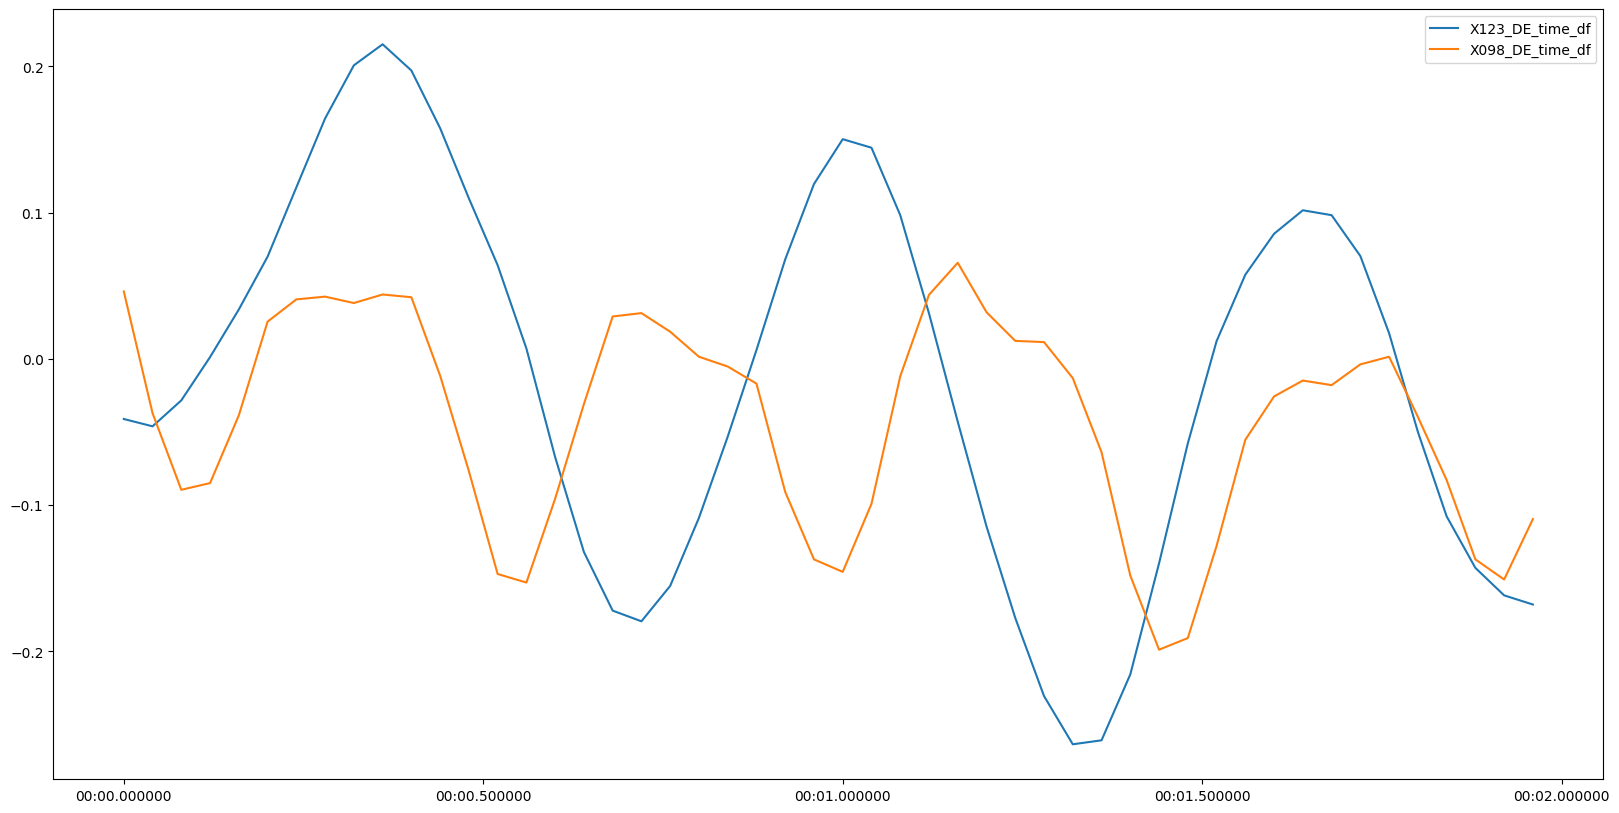

In [ ]:
import matplotlib.pyplot as plt
n_muestras = 50

ejex_X123_DE_time_df = X123_DE_time_df['datetime'].iloc[:n_muestras]
ejey_X123_DE_time_df = X123_DE_time_df['acelerometro'].iloc[:n_muestras]


ejex_X098_DE_time_df = X098_DE_time_df['datetime'].iloc[:n_muestras]
ejey_X098_DE_time_df = X098_DE_time_df['acelerometro'].iloc[:n_muestras]

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ejex_X123_DE_time_df, ejey_X123_DE_time_df, label='X123_DE_time_df')
ax.plot(ejex_X098_DE_time_df, ejey_X098_DE_time_df, label='X098_DE_time_df')

ax.legend()

plt.show()
